<a href="https://colab.research.google.com/github/Tarunparkar/ML/blob/main/ML_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np


In [ ]:
# Input data (XOR)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Expected output
y = np.array([[0],
              [1],
              [1],
              [0]])


In [ ]:
np.random.seed(42)  # for reproducibility

# Initialize weights and biases
W1 = np.random.rand(2, 2)   # weights from input → hidden
b1 = np.random.rand(1, 2)

W2 = np.random.rand(2, 1)   # weights from hidden → output
b2 = np.random.rand(1, 1)

# Learning rate
lr = 0.1


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


In [ ]:
for epoch in range(10000):
    # ---- Forward Propagation ----
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)

    # ---- Compute Error ----
    error = y - output

    # ---- Backpropagation ----
    d_output = error * sigmoid_derivative(output)
    d_hidden = d_output.dot(W2.T) * sigmoid_derivative(a1)

    # ---- Update Weights ----
    W2 += a1.T.dot(d_output) * lr
    b2 += np.sum(d_output, axis=0, keepdims=True) * lr
    W1 += X.T.dot(d_hidden) * lr
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr

    # ---- Display Progress ----
    if epoch % 2000 == 0:
        print(f"Epoch {epoch}")
        print("Output:\n", output)
        print("Error:\n", np.mean(np.abs(error)))
        print("W1:\n", W1)
        print("W2:\n", W2)
        print("-" * 40)


Epoch 0
Output:
 [[0.7501134 ]
 [0.7740691 ]
 [0.78391515]
 [0.79889097]]
Error:
 0.4977550305860017
W1:
 [[0.37446154 0.94985971]
 [0.73191319 0.59795633]]
W2:
 [[0.04560537]
 [0.85317541]]
----------------------------------------
Epoch 2000
Output:
 [[0.30450491]
 [0.56462151]
 [0.60778033]
 [0.58991929]]
Error:
 0.430505591830237
W1:
 [[0.27724284 2.88754338]
 [0.88414037 2.93976624]]
W2:
 [[-1.36402055]
 [ 2.62896786]]
----------------------------------------
Epoch 4000
Output:
 [[0.15228805]
 [0.83053062]
 [0.83001686]
 [0.20255928]]
Error:
 0.17357496319517723
W1:
 [[2.51856661 4.94663014]
 [2.53262971 5.03717625]]
W2:
 [[-5.65067763]
 [ 5.47722523]]
----------------------------------------
Epoch 6000
Output:
 [[0.08610566]
 [0.91740829]
 [0.91716684]
 [0.091526  ]]
Error:
 0.08576413241547484
W1:
 [[3.31538762 5.46462485]
 [3.32558422 5.519042  ]]
W2:
 [[-7.26599536]
 [ 6.71534198]]
----------------------------------------
Epoch 8000
Output:
 [[0.06437465]
 [0.94053822]
 [0.9403

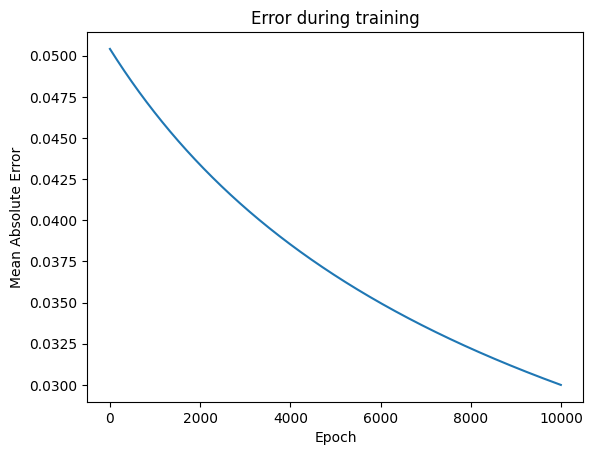

In [ ]:
import matplotlib.pyplot as plt

errors = []
for epoch in range(10000):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)
    error = y - output
    errors.append(np.mean(np.abs(error)))

    d_output = error * sigmoid_derivative(output)
    d_hidden = d_output.dot(W2.T) * sigmoid_derivative(a1)
    W2 += a1.T.dot(d_output) * lr
    b2 += np.sum(d_output, axis=0, keepdims=True) * lr
    W1 += X.T.dot(d_hidden) * lr
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr

plt.plot(errors)
plt.title("Error during training")
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.show()

